## 1. Load libraries & data postprocessing

In [23]:
import numpy as np
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
sns.set_context("talk")
results = pickle.load(open("results.pickle", 'rb'))

s1p_results = []
s3_results = []
models = [] 
hue = []
s1p_all_annotations = []
s3_all_annotations = []

for data_type in ["synthetic", "semi_natural", "natural"]:
    for model in ["tiny", "small", "all"]:
        s1p_annotations = []
        s3_annotations = []
        for t in range(1, 11):
            size_results = [results[(f"transformer_{model}_{seed}", seed, "s_conj", data_type, t)]
                            for seed in [1, 2, 3, 4, 5]]
            s1p, s3 = zip(*size_results)
            s1p_results.append(np.mean(s1p))
            s3_results.append(np.mean(s3))
            #print(model, data_type, t, np.mean(s3))
            models.append(model)
            hue.append(data_type)
            s1p_annotations.append((np.mean(s1p), data_type, model, t))
            s3_annotations.append((np.mean(s3), data_type, model, t))
        s3_all_annotations.append(min(s3_annotations))
        s3_all_annotations.append(max(s3_annotations))
        s1p_all_annotations.append(min(s1p_annotations))
        s1p_all_annotations.append(max(s1p_annotations))

## 2. Main systematicity results for S --> S CONJ S and S --> NP VP

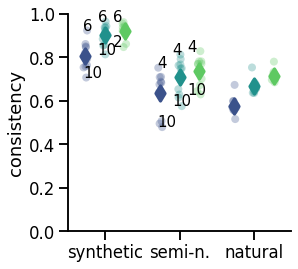

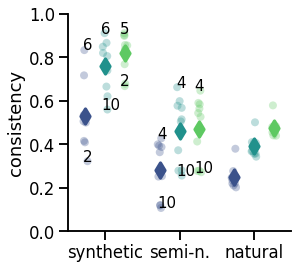

In [17]:
plt.figure(figsize=(4, 4))
sns.stripplot(x=hue, y=s1p_results, hue=models, dodge=True, zorder=1, label=None, alpha=0.3, size=8, palette="viridis")
ax = sns.pointplot(x=hue, y=s1p_results, hue=models,
              dodge=.532, join=False, 
              markers="d", scale=1.05, ci=None, palette="viridis")
plt.legend([], [], frameon=False)
sns.despine(top=True, right=True)
ax.set_xticklabels(["synthetic", "semi-n.", "natural"])
ax.set_ylabel("consistency")
plt.ylim(0.0, 1)
for y, x, m, t in s1p_all_annotations:
    if x == "natural":
        continue
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.1
    if m == "all":
        x += 0.1
    plt.text(x, y, t, fontsize=15)
plt.savefig("figures/s1p.pdf", bbox_inches="tight")
plt.show()


plt.figure(figsize=(4, 4))
ax = sns.pointplot(x=hue, y=s3_results, hue=models,
              dodge=.532, join=False, 
              markers="d", scale=1.05, ci=None, palette="viridis")
sns.stripplot(x=hue, y=s3_results, hue=models, dodge=True, zorder=-1, label=None, alpha=0.3, size=8, palette="viridis")
plt.legend([], [], frameon=False) #["tiny", "small", "all"], bbox_to_anchor=(0.57, 1.05))
sns.despine(top=True, right=True)
ax.set_xticklabels(["synthetic", "semi-n.", "natural"])
ax.set_ylabel("consistency")
plt.ylim(0.0, 1)
for y, x, m, t in s3_all_annotations:
    if x == "natural":
        continue
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.05
    if m == "all":
        x += 0.2
    plt.text(x, y, t, fontsize=15)
#ax.set_yticks([])
plt.savefig("figures/s3.pdf", bbox_inches="tight")
plt.show()

/home/vernadankers/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vernadankers/anaconda3/envs/py38/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


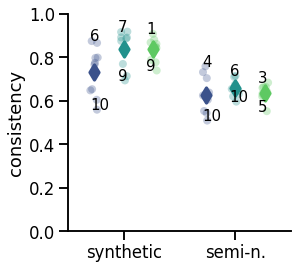

In [18]:
s1p_results = []
s3_results = []
models = [] 
hue = []
np_all_annotations = []
vp_all_annotations = []

for data_type in ["synthetic", "semi_natural"]:
    for model in ["tiny", "small", "all"]:
        np_annotations = []
        vp_annotations = []
        for t in range(1, 11):
            size_results = [results[(f"transformer_{model}_{seed}", seed, "s_np_vp", data_type, t)]
                            for seed in [1, 2, 3, 4, 5]]
            s1p, s3 = zip(*size_results)
            s1p_results.append(np.mean(s1p))
            s3_results.append(np.mean([x for x in s3 if x is not None]))
            models.append(model)
            hue.append(data_type)
            np_annotations.append((np.mean(s1p), data_type, model, t))
            if data_type != "semi_natural":
                vp_annotations.append((np.mean(s3), data_type, model, t))
        np_all_annotations.append(min(np_annotations))
        np_all_annotations.append(max(np_annotations))
        if data_type != "semi_natural":
            vp_all_annotations.append(min(vp_annotations))
            vp_all_annotations.append(max(vp_annotations))

plt.figure(figsize=(4, 4))
sns.stripplot(x=hue, y=s1p_results, hue=models, dodge=True, zorder=1, label=None, alpha=0.3, size=8, palette="viridis")
ax = sns.pointplot(x=hue, y=s1p_results, hue=models,
              dodge=.532, join=False, 
              markers="d", scale=1.05, ci=None, palette="viridis")
plt.legend([], [], frameon=False)
sns.despine(top=True, right=True)
ax.set_xticklabels(["synthetic", "semi-n."])
ax.set_ylabel("consistency") #"consistency")
plt.ylim(0.0, 1)
for y, x, m, t in np_all_annotations:
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.05
    if m == "all":
        x += 0.2
    plt.text(x, y, t, fontsize=15)
plt.savefig("figures/np.pdf", bbox_inches="tight")
plt.show()

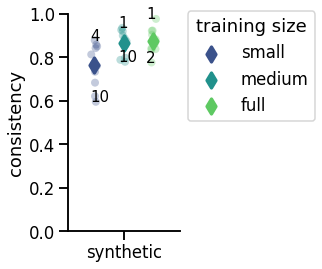

In [19]:
plt.figure(figsize=(2, 4))
ax = sns.pointplot(x=hue, y=s3_results, hue=models,
              dodge=.532, join=False, 
              markers="d", scale=1.05, ci=None, palette="viridis")
sns.stripplot(x=hue, y=s3_results, hue=models, dodge=True, zorder=-1, label=None, alpha=0.3, size=8, palette="viridis")
sns.despine(top=True, right=True)
plt.xticks([0])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylim(0, 1)
plt.xlim(-0.5, 0.5)
plt.ylabel("consistency")
ax.set_xticklabels(["synthetic"])
plt.ylim(0.0, 1)
for y, x, m, t in vp_all_annotations:
    x = {"synthetic": 0, "semi_natural": 1, "natural": 2}[x]
    if m == "tiny":
        x -= 0.3
    if m == "small":
        x -=0.05
    if m == "all":
        x += 0.2
    plt.text(x, y, t, fontsize=15)
plt.legend(["small", "medium", "full"], title="training size", bbox_to_anchor=(1.0, 1.05))
plt.savefig("figures/vp.pdf", bbox_inches="tight")
plt.show()

## 3. Figure for ELLIS NLP poster session

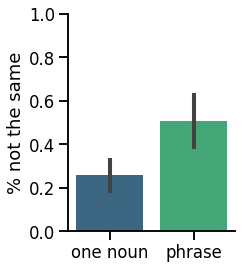

In [20]:
import numpy as np

sns.set_context("talk")
results = pickle.load(open("results.pickle", 'rb'))
s1_all, s3_all = [], []
s_np_vp = []
s_conj = []
hue = []
models = []

for data_type in ["synthetic", "semi_natural", "natural"]:
    for model in ["tiny", "small", "all"]:
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_conj", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for t in range(1, 11)]
        s1p, s3 = zip(*size_results)
        s3_all.append(1 - np.mean(s3)) #- ((np.mean(s1p) + np.mean(s1p)) / 2))
        s1_all.append(1 - np.mean(s1p))
        hue.append(data_type)
        models.append({"tiny": 5, "small": 10, "all": 20}[model])

plt.figure(figsize=(3, 4))
ax = sns.barplot(x=["one noun"] * len(s1_all) + ["phrase"] * len(s3_all), y=s1_all + s3_all,
                 palette="viridis")

plt.legend([], [], frameon=False)
sns.despine(top=True, right=True)
ax.set_ylabel("% not the same")
plt.ylim(0.0, 1)
plt.savefig("figures/poster.pdf", bbox_inches="tight")
plt.show()


## 4. Create table for appendix

In [24]:
for data_type in ["synthetic", "semi_natural"]:
    np_results = []
    vp_results = []
    for model in ["tiny", "small", "all"]:
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_np_vp", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for t in range(1, 11)]
        np_, vp = zip(*size_results)
        np_results.append(f"{np.nanmean(np_):.2f}")
        vp_results.append(f"{np.nanmean([x for x in vp if x is not None]):.2f}")
    print(f"{data_type} & NP & " + " & ".join(np_results).replace("0.", ".") + " \\\\")
    if data_type == "synthetic":
        print(f"{data_type} & VP & " + " & ".join(vp_results).replace("0.", ".") + " \\\\")

for data_type in ["synthetic", "semi_natural", "natural"]:
    np_results = []
    vp_results = []
    for model in ["tiny", "small", "all"]:
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_conj", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for t in range(1, 11)]
        np_, vp = zip(*size_results)
        np_results.append(f"{np.mean(np_):.2f}")
        vp_results.append(f"{np.mean(vp):.2f}")
    print(f"{data_type} & $\\text{{S}}^\prime_1$ & " + " & ".join(np_results).replace("0.", ".") + " \\\\")
    print(f"{data_type} & $\\text{{S}}_3$ & " + " & ".join(vp_results).replace("0.", ".") + " \\\\")
    

for data_type in ["synthetic", "semi_natural"]:
    s1p_results = []
    s3_results = []
    for t in range(1, 11):
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_np_vp", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for model in ["tiny", "small", "all"]]
        s1p, s3 = zip(*size_results)
        s1p_results.append(f"{np.nanmean(s1p):.2f}")
        s3_results.append(f"{np.nanmean([x for x in s3 if x is not None]):.2f}")
    print(" & ".join(s1p_results).replace("0.", ".") + " \\\\")
    if data_type == "synthetic":
        print(" & ".join(s3_results).replace("0.", ".") + " \\\\")

for data_type in ["synthetic", "semi_natural", "natural"]:
    s1p_results = []
    s3_results = []
    for t in range(1, 11):
        size_results = [results[(f"transformer_{model}_{seed}", seed, "s_conj", data_type, t)]
                        for seed in [1, 2, 3, 4, 5] for model in ["tiny", "small", "all"]]
        s1p, s3 = zip(*size_results)
        s1p_results.append(f"{np.mean(s1p):.2f}")
        s3_results.append(f"{np.mean(s3):.2f}")
    print(" & ".join(s1p_results).replace("0.", ".") + " \\\\")
    print(" & ".join(s3_results).replace("0.", ".") + " \\\\")

synthetic & NP & .73 & .84 & .84 \\
synthetic & VP & .76 & .87 & .88 \\
semi_natural & NP & .63 & .66 & .64 \\
synthetic & $\text{S}^\prime_1$ & .81 & .90 & .92 \\
synthetic & $\text{S}_3$ & .53 & .76 & .82 \\
semi_natural & $\text{S}^\prime_1$ & .63 & .71 & .73 \\
semi_natural & $\text{S}_3$ & .28 & .46 & .47 \\
natural & $\text{S}^\prime_1$ & .58 & .67 & .72 \\
natural & $\text{S}_3$ & .25 & .39 & .47 \\
.86 & .74 & .85 & .87 & .75 & .89 & .85 & .85 & .70 & .68 \\
.92 & .73 & .90 & .91 & .84 & .88 & .85 & .82 & .77 & .74 \\
.66 & .63 & .65 & .70 & .64 & .69 & .63 & .63 & .60 & .58 \\
.91 & .82 & .88 & .88 & .86 & .95 & .90 & .91 & .84 & .79 \\
.75 & .54 & .72 & .66 & .73 & .88 & .74 & .81 & .66 & .55 \\
.73 & .75 & .75 & .80 & .75 & .73 & .66 & .60 & .59 & .56 \\
.50 & .50 & .51 & .58 & .52 & .43 & .35 & .23 & .23 & .21 \\
.67 & .74 & .65 & .64 & .63 & .64 & .62 & .66 & .63 & .66 \\
.39 & .49 & .35 & .35 & .34 & .37 & .33 & .38 & .34 & .38 \\


/tmp/ipykernel_8091/1745160716.py:9: RuntimeWarning: Mean of empty slice
  vp_results.append(f"{np.nanmean([x for x in vp if x is not None]):.2f}")
/tmp/ipykernel_8091/1745160716.py:35: RuntimeWarning: Mean of empty slice
  s3_results.append(f"{np.nanmean([x for x in s3 if x is not None]):.2f}")
